## 9-6. scikit-learn 주요 모듈 - 회귀모델 실습

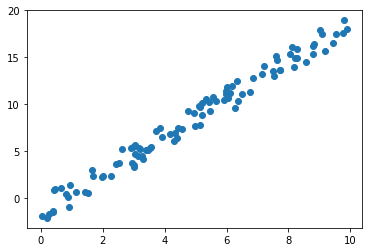

In [7]:
import numpy as np
import matplotlib.pyplot as plt
r = np.random.RandomState(10)
x = 10 * r.rand(100)
y = 2 * x - 3 * r.rand(100)
plt.scatter(x,y)

In [8]:
# 입력 데이터 x와 정답 데이터 y의 모양 확인하기
x.shape

(100,)

In [9]:
y.shape

(100,)

### x,y의 모양은 (100,)으로 1차원 벡터

사이킷런에서 머신러닝 모델 사용을 위해 모델 객체 생성하기

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

### fit() 메소드를 이용하여 선형회귀모델 훈련시키기
메소드 인자에 특성 행렬과 타겟 벡터 입력
(행렬형태 입력데이터와 1d 벡터 형태의 정답(라벨)을 각각 입력

In [12]:
# ! 에러 발생
model.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[7.71320643 0.20751949 6.33648235 7.48803883 4.98507012 2.24796646
 1.98062865 7.60530712 1.69110837 0.88339814 6.85359818 9.53393346
 0.03948266 5.12192263 8.12620962 6.12526067 7.21755317 2.91876068
 9.17774123 7.14575783 5.42544368 1.42170048 3.7334076  6.74133615
 4.41833174 4.34013993 6.17766978 5.13138243 6.50397182 6.01038953
 8.05223197 5.21647152 9.08648881 3.19236089 0.90459349 3.00700057
 1.13984362 8.28681326 0.46896319 6.26287148 5.47586156 8.19286996
 1.9894754  8.56850302 3.51652639 7.54647692 2.95961707 8.8393648
 3.25511638 1.65015898 3.92529244 0.93460375 8.21105658 1.5115202
 3.84114449 9.44260712 9.87625475 4.56304547 8.26122844 2.51374134
 5.97371648 9.0283176  5.34557949 5.90201363 0.39281767 3.57181759
 0.7961309  3.05459918 3.30719312 7.73830296 0.39959209 4.29492178
 3.14926872 6.36491143 3.4634715  0.43097356 8.79915175 7.63240587
 8.78096643 4.17509144 6.05577564 5.13466627 5.97836648 2.62215661
 3.00871309 0.25399782 3.03062561 2.42075875 5.57578189 5.6550702
 4.75132247 2.92797976 0.64251061 9.78819146 3.39707844 4.95048631
 9.77080726 4.40773825 3.18272805 5.19796986].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

=> x를 행렬로 바꿔줘야한다    
x는 numpy의 ndarray타입이므로 reshape()    
특성 행렬의 변수명: X

In [13]:
X = x.reshape(100,1)

In [14]:
# X를 fit()의 인자로 넣기
model.fit(X,y)

LinearRegression()

### 입력 데이터와 라벨로 훈련을 완료하였으므로 예측 가즈아~
np.linspace()로 새로운 데이터 생성    
predict()로 예측, 인자는 행렬로 넣기!

In [15]:
x_new = np.linspace(-1, 11, 100)
X_new = x_new.reshape(100,1)
y_new = model.predict(X_new)

reshape() 함수에서 나머지 숫자를 -1로 넣으면 자동으로 남은 숫자를 계산해 줍니다. 즉, x_new의 인자의 개수가 100개이므로, (100, 1)의 형태나 (2, 50)의 형태 등으로 변환해 줄 수 있는데요. (2, -1)을 인자로 넣으면 (2, 50)의 형태로 자동으로 변환해 줍니다. 아래 코드를 통해 확인해 보세요.

In [16]:
X_ = x_new.reshape(-1,1)
X_.shape

(100, 1)

### 예측치로 모델 성능 평가하기

In [18]:
# sklearn.metrics의 성능 평가 관련 모듈 사용
# 회귀모델의 경우 RMSE(Root Mean Square Error)로 성능평가
# RMSE오차함수 스펙 확인하고 코드로 구현하기
# (mean_suqared_erorr)함수의 공식을 본 후 mp.sqrt 활용하기
# https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

In [ ]:
from sklearn.metrics import mean_square_error
error=(y_true,y_pred)

Structured 데이터란 행과 열이 있는 2차원 형태의 표 데이터로, 다른 말로는 정형 데이터라고 하기도 한다.    
각 행은 하나의 데이터 포인트들을 나타내고, 각 열은 각 데이터 포인트의 특징들을 나타낸다.

### cats_vs_dogs data 사용

In [22]:
import tensorflow_datasets as tfds

tfds.__version__

'3.2.1'

In [23]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

KeyboardInterrupt: 